## Demo display curves

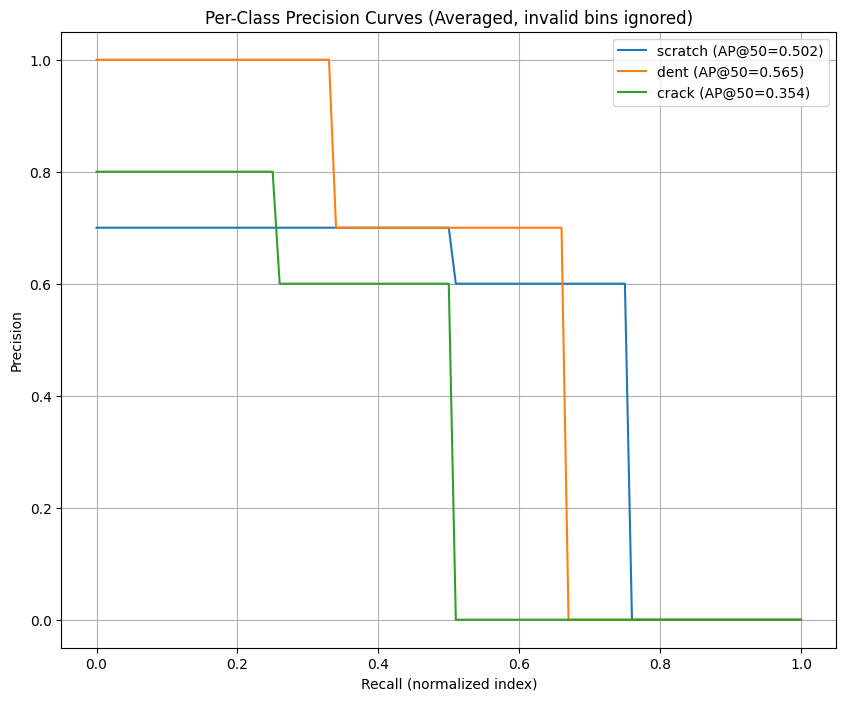

In [ ]:
import torch
from torchmetrics.detection.mean_ap import MeanAveragePrecision
import matplotlib.pyplot as plt

CLASSES = ["scratch", "dent", "crack"]

# ---- Hardcoded Demo Data ----------------------------------------------------

def make_box(x1, y1, x2, y2):
    return torch.tensor([x1, y1, x2, y2], dtype=torch.float)

ground_truths = [
    {  # image 1
        "boxes": torch.stack([make_box(10, 10, 60, 60)]),
        "labels": torch.tensor([0])   # scratch
    },
    {  # image 2
        "boxes": torch.stack([make_box(30, 30, 80, 80)]),
        "labels": torch.tensor([1])   # dent
    },
    {  # image 3
        "boxes": torch.stack([make_box(100, 50, 160, 120)]),
        "labels": torch.tensor([2])   # crack
    },
    {  # image 4
        "boxes": torch.stack([make_box(50, 50, 120, 120)]),
        "labels": torch.tensor([0])
    },
    {  # image 5
        "boxes": torch.stack([make_box(20, 100, 70, 160)]),
        "labels": torch.tensor([1])
    },
    {  # image 6
        "boxes": torch.stack([make_box(100, 10, 150, 50)]),
        "labels": torch.tensor([2])
    },
    {  # image 7
        "boxes": torch.stack([make_box(15, 20, 60, 90)]),
        "labels": torch.tensor([0])
    },
    {  # image 8
        "boxes": torch.stack([make_box(110, 40, 150, 90)]),
        "labels": torch.tensor([1])
    },
    {  # image 9 (two objects)
        "boxes": torch.stack([
            make_box(20, 20, 60, 60),
            make_box(120, 30, 160, 70)
        ]),
        "labels": torch.tensor([0, 2])
    },
    {  # image 10
        "boxes": torch.stack([make_box(80, 80, 140, 140)]),
        "labels": torch.tensor([2])
    },
]

# Preds intentionally include mistakes
predictions = [
    {  # image 1 - good overlap
        "boxes": torch.stack([make_box(12, 12, 58, 58)]),
        "scores": torch.tensor([0.9]),
        "labels": torch.tensor([0])
    },
    {  # image 2 - bad overlap (FP)
        "boxes": torch.stack([make_box(0, 0, 20, 20)]),
        "scores": torch.tensor([0.7]),
        "labels": torch.tensor([1])
    },
    {  # image 3 - slightly off
        "boxes": torch.stack([make_box(102, 55, 155, 118)]),
        "scores": torch.tensor([0.8]),
        "labels": torch.tensor([2])
    },
    {  # image 4 - FP
        "boxes": torch.stack([make_box(10, 10, 40, 40)]),
        "scores": torch.tensor([0.6]),
        "labels": torch.tensor([0])
    },
    {  # image 5 - perfect match
        "boxes": torch.stack([make_box(20, 100, 70, 160)]),
        "scores": torch.tensor([0.95]),
        "labels": torch.tensor([1])
    },
    {  # image 6 - miss
        "boxes": torch.stack([make_box(200, 200, 250, 250)]),
        "scores": torch.tensor([0.3]),
        "labels": torch.tensor([2])
    },
    {  # image 7 - OK match
        "boxes": torch.stack([make_box(20, 25, 58, 88)]),
        "scores": torch.tensor([0.85]),
        "labels": torch.tensor([0])
    },
    {  # image 8 - good
        "boxes": torch.stack([make_box(108, 38, 148, 88)]),
        "scores": torch.tensor([0.88]),
        "labels": torch.tensor([1])
    },
    {  # image 9 - one good, one miss
        "boxes": torch.stack([
            make_box(22, 22, 58, 58),
            make_box(0, 0, 20, 20)
        ]),
        "scores": torch.tensor([0.9, 0.4]),
        "labels": torch.tensor([0, 2])
    },
    {  # image 10 - ok
        "boxes": torch.stack([make_box(82, 82, 138, 138)]),
        "scores": torch.tensor([0.92]),
        "labels": torch.tensor([2])
    },
]


metric = MeanAveragePrecision(class_metrics=True, extended_summary=True)
metric.update(predictions, ground_truths)
results = metric.compute()

import matplotlib.pyplot as plt


import torch
import matplotlib.pyplot as plt

import torch
import matplotlib.pyplot as plt

def plot_pr_curves_with_ap50(results, classes):
    precision = results["precision"]  # [IoU, recall_points, classes, area, max_det]
    num_iou, num_recalls, num_classes, num_area, num_maxdets = precision.shape
    recall_axis = torch.linspace(0, 1, num_recalls)

    # Check if AP@50 is available
    if "map_50_per_class" in results:
        ap50_per_class = results["map_50_per_class"].detach().cpu()
    else:
        # fallback: use map_per_class (averaged over IoUs)
        ap50_per_class = results["map_per_class"].detach().cpu()

    fig, ax = plt.subplots(figsize=(10, 8))

    for c in range(num_classes):
        p = precision[:, :, c, :, :]  # [IoU, rec, area, max_det]

        # Mask invalid bins (<0)
        p = torch.where(p < 0, torch.nan, p)

        # Average over IoUs, area ranges, max_dets, ignoring NaNs
        p_mean = torch.nanmean(p, dim=(0, 2, 3)).detach().cpu()

        # Append AP@50 to label
        label = f"{classes[c]} (AP@50={ap50_per_class[c]:.3f})"
        ax.plot(recall_axis, p_mean, label=label)

    ax.set_xlabel("Recall (normalized index)")
    ax.set_ylabel("Precision")
    ax.set_title("Per-Class Precision Curves (Averaged, invalid bins ignored)")
    ax.legend()
    ax.grid(True)
    plt.show()



plot_pr_curves_with_ap50(results, CLASSES)



## Compare yolo curves against those

In [2]:
from ultralytics.models.yolo import YOLO

from ml_carbucks import RESULTS_DIR
from ml_carbucks.adapters.UltralyticsAdapter import YoloUltralyticsAdapter
from ml_carbucks.utils.DatasetsPathManager import DatasetsPathManager
from ml_carbucks.utils.preprocessing import create_clean_loader

model = YOLO("yolo11l.pt")

tres = model.train(
    data="/home/bachelor/ml-carbucks/data/car_dd/dataset.yaml",
    epochs=10,
    imgsz=512,
)

print(tres)


    

New https://pypi.org/project/ultralytics/8.3.233 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.229 🚀 Python-3.12.3 torch-2.8.0+cu128 CUDA:0 (NVIDIA RTX 4000 SFF Ada Generation, 20154MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/home/bachelor/ml-carbucks/data/car_dd/dataset.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=512, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11l.pt, momentum=0.937, mosaic=1.0, multi_scale=

In [13]:
model.save(RESULTS_DIR / "yolo11l_car_dd.pt")

In [6]:
eres = model.val(
    data="/home/bachelor/ml-carbucks/data/car_dd/dataset.yaml",
    batch=16,
    # --- Inference-time thresholds ---
    iou=0.7,
    conf=0.001,
    max_det=300,
)

print(eres.results_dict)
print(eres.results_dict["metrics/mAP50(B)"])



Ultralytics 8.3.229 🚀 Python-3.12.3 torch-2.8.0+cu128 CUDA:0 (NVIDIA RTX 4000 SFF Ada Generation, 20154MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 5011.0±1670.2 MB/s, size: 683.4 KB)
val: Scanning /home/bachelor/ml-carbucks/data/car_dd/labels/val.cache... 633 images, 177 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 810/810 4.2Mit/s 0.0s0s


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 51/51 8.6it/s 5.9s0.1s
                   all        810       1406      0.239      0.219      0.159     0.0701
               scratch        431        728      0.256      0.413      0.254      0.117
                  dent        352        501      0.338      0.226      0.202      0.088
                 crack        122        177      0.122     0.0169     0.0202    0.00492
Speed: 0.2ms preprocess, 5.8ms inference, 0.0ms loss, 0.4ms postprocess per image
Results saved to /home/bachelor/ml-carbucks/runs/detect/val68
{'metrics/precision(B)': 0.238628808667775, 'metrics/recall(B)': 0.21865319773317335, 'metrics/mAP50(B)': 0.15867018098127414, 'metrics/mAP50-95(B)': 0.07011696822064076, 'fitness': 0.07011696822064076}
0.15867018098127414


In [26]:
pres = model.predict(
    source="/home/bachelor/ml-carbucks/data/car_dd/images/val",
    imgsz=512,
    batch=16,
    # --- Inference-time thresholds ---
    iou=0.7,
    conf=0.001,
    max_det=300,
)


In [47]:
from pathlib import Path


print(pres[0].path)
print(len(pres))

res_mapper = {}

for i, r in enumerate(pres):
    p_path = r.path
    img_name = Path(p_path).name
    res_mapper[img_name] = r

/home/bachelor/ml-carbucks/data/car_dd/images/val/000013.jpg
810


In [72]:
from pathlib import Path
evaluator = MeanAveragePrecision(class_metrics=True, extended_summary=True, iou_thresholds=[0.5])
loader = create_clean_loader(
    datasets=DatasetsPathManager.CARDD_VAL,
    shuffle=False,
    batch_size=16,
    transforms=None,
    debugging=True
)


for images, targets in loader:
    for target in targets:
        target_name = Path(target["image_path"]).name
        
        pred = res_mapper[f"{target_name}"]

        boxes = pred.boxes.xyxy
        labels = pred.boxes.cls + 1
        scores = pred.boxes.conf
 

        evaluator.update(
            [{
                "boxes": boxes.detach().cpu(), # type: ignore
                "scores": scores.detach().cpu(), # type: ignore
                "labels": labels.detach().cpu().long(), # type: ignore
            }],
            [{
                "boxes": target["boxes"].detach().cpu(), # type: ignore
                "labels": target["labels"].detach().cpu().long() # type: ignore
            }]
        )


eval_results = evaluator.compute()
print(eval_results.keys())
print(eval_results["map_50"])
        

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


/home/bachelor/ml-carbucks/.venv/lib/python3.12/site-packages/torchmetrics/utilities/prints.py:43: UserWarning: Encountered more than 100 detections in a single image. This means that certain detections with the lowest scores will be ignored, that may have an undesirable impact on performance. Please consider adjusting the `max_detection_threshold` to suit your use case. To disable this warning, set attribute class `warn_on_many_detections=False`, after initializing the metric.
  warnings.warn(*args, **kwargs)


dict_keys(['map', 'map_50', 'map_75', 'map_small', 'map_medium', 'map_large', 'mar_1', 'mar_10', 'mar_100', 'mar_small', 'mar_medium', 'mar_large', 'ious', 'precision', 'recall', 'scores', 'map_per_class', 'mar_100_per_class', 'classes'])
tensor(0.1591)


tensor([0.2551, 0.1980, 0.0243])
tensor(0.1591)
tensor([[[[[ 1.0000,  1.0000,  1.0000],
           [-1.0000, -1.0000, -1.0000],
           [ 1.0000,  1.0000,  1.0000],
           [ 1.0000,  1.0000,  1.0000]],

          [[ 1.0000,  1.0000,  1.0000],
           [ 0.0000,  0.0000,  0.0000],
           [ 0.5000,  0.5000,  0.5000],
           [ 1.0000,  1.0000,  1.0000]],

          [[ 1.0000,  1.0000,  1.0000],
           [ 0.0000,  1.0000,  1.0000],
           [ 0.5000,  0.3333,  0.3333],
           [ 1.0000,  1.0000,  1.0000]]],


         [[[ 0.7917,  0.8000,  0.8000],
           [-1.0000, -1.0000, -1.0000],
           [ 1.0000,  1.0000,  1.0000],
           [ 0.7826,  0.7917,  0.7917]],

          [[ 1.0000,  1.0000,  1.0000],
           [ 0.0000,  0.0000,  0.0000],
           [ 0.5000,  0.5000,  0.5000],
           [ 1.0000,  1.0000,  1.0000]],

          [[ 0.6667,  0.5000,  0.5000],
           [ 0.0000,  1.0000,  1.0000],
           [ 0.5000,  0.3333,  0.3333],
           [ 1.0000,

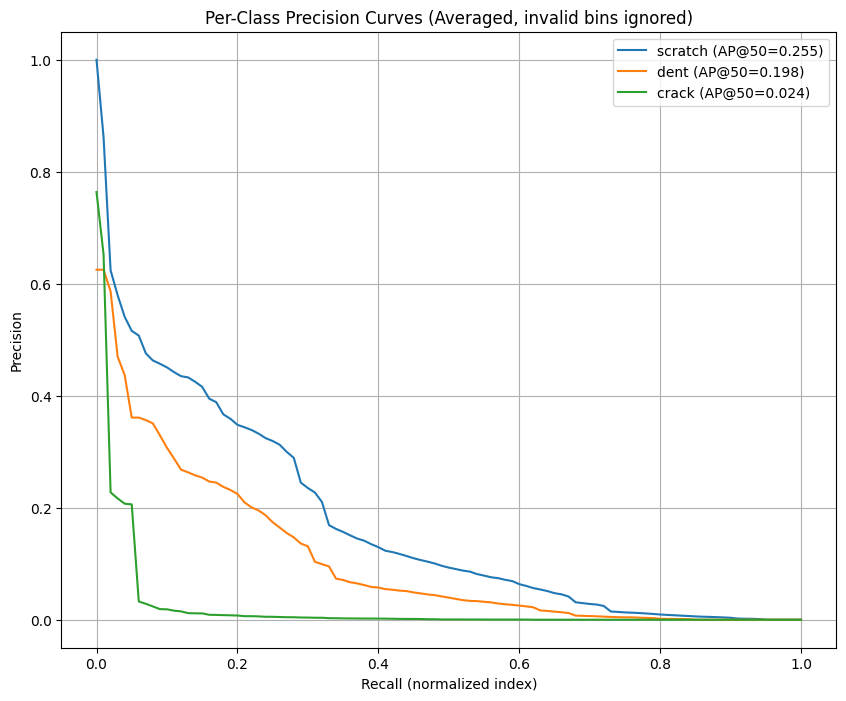

In [74]:
print(eval_results["map_per_class"])
print(eval_results["map_50"])
print(eval_results["precision"])
plot_pr_curves_with_ap50(eval_results, CLASSES)

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


/home/bachelor/ml-carbucks/.venv/lib/python3.12/site-packages/torchmetrics/utilities/prints.py:43: UserWarning: Encountered more than 100 detections in a single image. This means that certain detections with the lowest scores will be ignored, that may have an undesirable impact on performance. Please consider adjusting the `max_detection_threshold` to suit your use case. To disable this warning, set attribute class `warn_on_many_detections=False`, after initializing the metric.
  warnings.warn(*args, **kwargs)


tensor(0.1505)


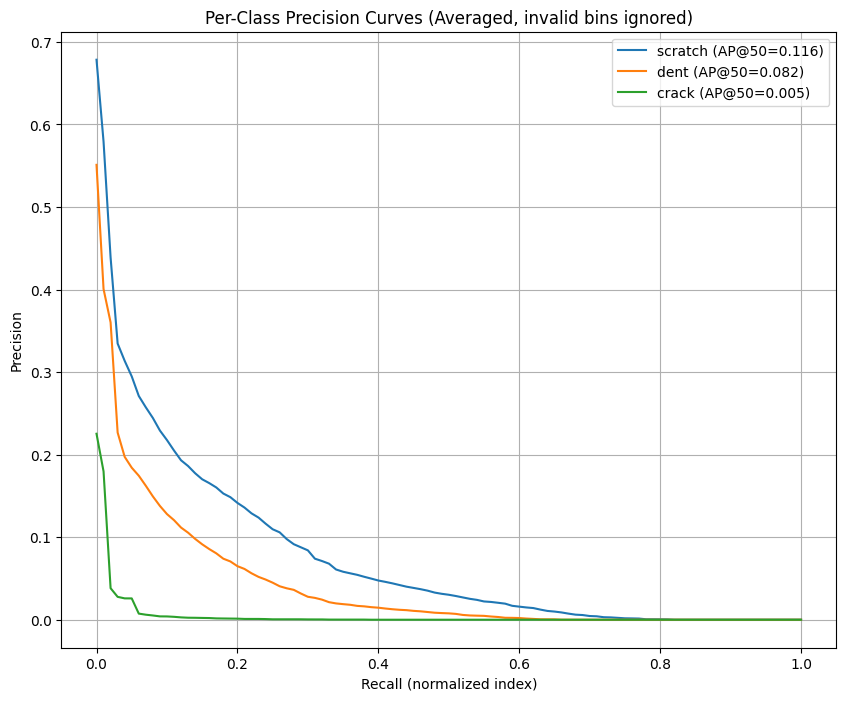

In [58]:
from ml_carbucks.adapters.BaseDetectionAdapter import ADAPTER_PREDICTION


evaluator = MeanAveragePrecision(class_metrics=True, extended_summary=True)
loader = create_clean_loader(
    datasets=DatasetsPathManager.CARDD_VAL,
    shuffle=False,
    batch_size=16,
    transforms=None,
)

for images, targets in loader:
    results = model.predict(  # type: ignore
        source=images,
        imgsz=512,
        batch=len(images),
        verbose=False,
        # --- Inference-time thresholds ---
        conf=0.01,
        iou=0.7,
        max_det=500,
    )

    all_detections: list[ADAPTER_PREDICTION] = []
    for result in results:        
        if result.boxes is None:
            raise ValueError("No boxes detected in the result.")
        boxes = result.boxes.xyxy
        scores = result.boxes.conf
        labels = (
            result.boxes.cls + 1
        )  # Ultralytics class ids are 0-based so we increment by 1
        prediction: ADAPTER_PREDICTION = {
            "boxes": boxes,
            "scores": scores,
            "labels": labels.long(), # type: ignore
        }
        all_detections.append(prediction)
    predictions = all_detections
    # predictions = model.predict(images, conf_threshold=0.01, max_detections=10, iou_threshold=0.7)
    preds = [
        {
            "boxes": pred["boxes"].detach().cpu(),
            "scores": pred["scores"].detach().cpu(),
            "labels": pred["labels"].detach().cpu().long(),
        }
        for pred in predictions
    ]
    evaluator.update(preds, targets)
results = evaluator.compute()
print(results["map_50"])
plot_pr_curves_with_ap50(results, CLASSES)